In [2]:
##
df=pd.read_csv('C:\\Users\pc\Desktop\medical insurance cost (regre)\\insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(1338, 7)

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

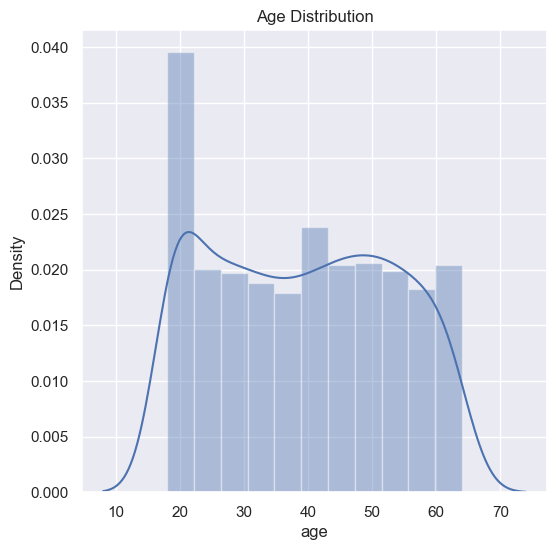

In [7]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()
### we have almost equal numbers of ages except for those are 20  these distribution are higher than the orhers 

In [8]:
### 
age_counts = df.groupby('age').size()
age_counts
### as we can see those which are 18 and 19 are totaly (69,68) observations and the rest ages are between 20and 30 observation 

age
18    69
19    67
20    29
21    28
22    28
23    28
24    28
25    28
26    28
27    28
28    28
29    27
30    27
31    27
32    26
33    26
34    26
35    25
36    25
37    25
38    25
39    25
40    27
41    27
42    27
43    27
44    27
45    29
46    29
47    29
48    29
49    28
50    29
51    29
52    29
53    28
54    28
55    26
56    26
57    26
58    25
59    25
60    23
61    23
62    23
63    23
64    22
dtype: int64

In [9]:
age_counts.mean()

28.4468085106383

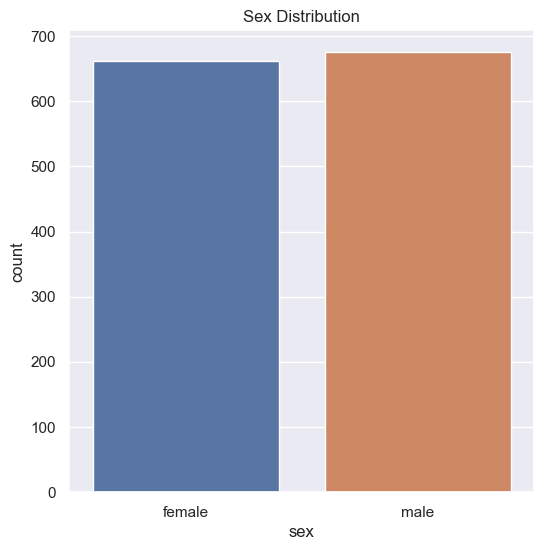

In [10]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

In [11]:
df['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

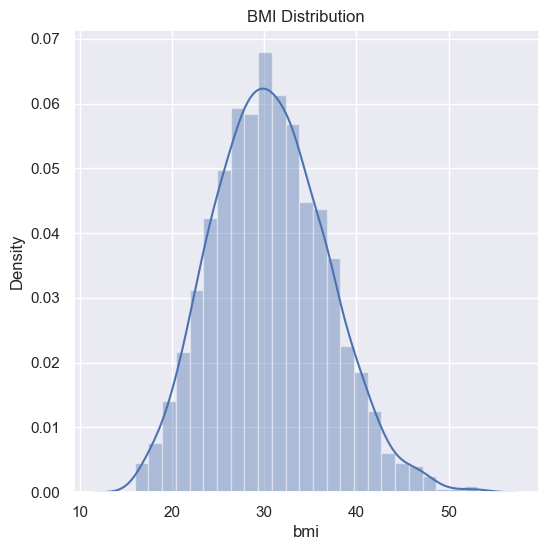

In [12]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()
### look like anormal distrbution

Normal BMI Range --> 18.5 to 24.9

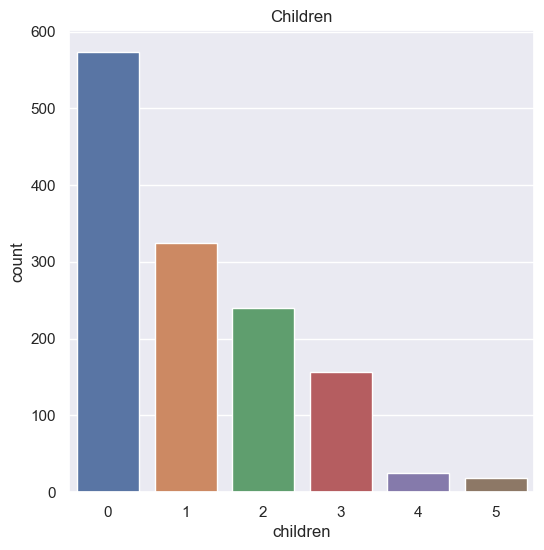

In [13]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

In [14]:
df['children'].value_counts()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

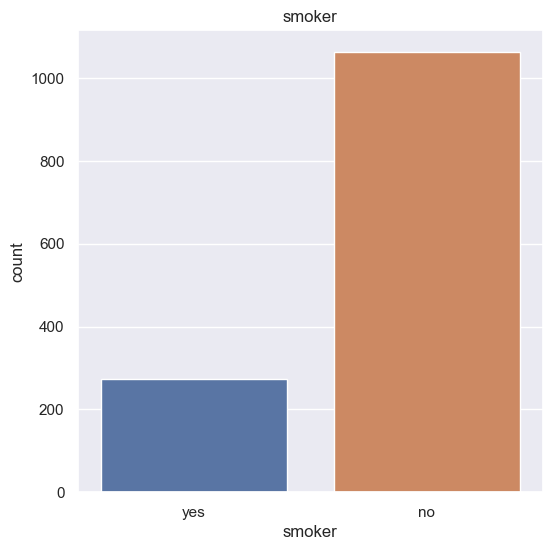

In [15]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

In [16]:
df['children'].value_counts()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

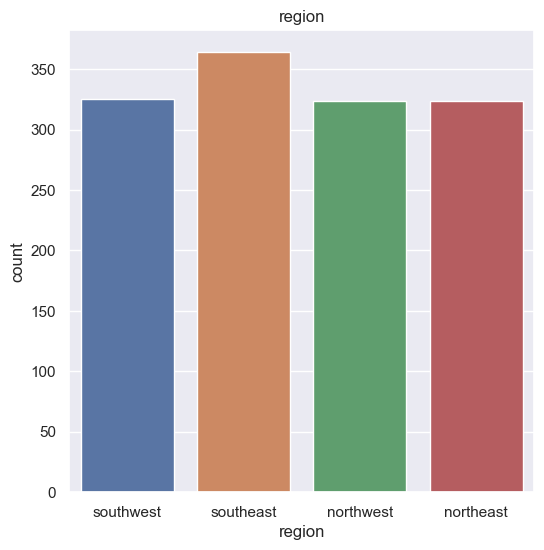

In [17]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('region')
plt.show()

In [18]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

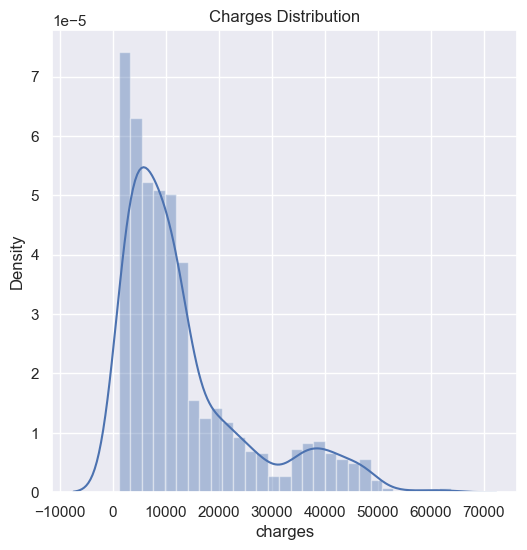

In [19]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

In [20]:
df['charges'].value_counts()
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# Data reprocessing


In [21]:
#encoding the categorical features 
## convert sex to numerical variable(dummy variable) male will take 1 and female will take 0
sex_dummies = pd.get_dummies(df['sex'], prefix='sex', drop_first=True)
sex_dummies = sex_dummies.astype(int)  # Convert dummy variables to integers (0 and 1)
df = pd.concat([df, sex_dummies], axis=1)
df = df.drop(columns=['sex'])  


In [22]:
df.head(10)

,age,bmi,children,smoker,region,charges,sex_male
0,19,27.900,0,yes,southwest,16884.92400,0
1,18,33.770,1,no,southeast,1725.55230,1
2,28,33.000,3,no,southeast,4449.46200,1
3,33,22.705,0,no,northwest,21984.47061,1
4,32,28.880,0,no,northwest,3866.85520,1
5,31,25.740,0,no,southeast,3756.62160,0
6,46,33.440,1,no,southeast,8240.58960,0
7,37,27.740,3,no,northwest,7281.50560,0
8,37,29.830,2,no,northeast,6406.41070,1
9,60,25.840,0,no,northwest,28923.13692,0


In [23]:
## convert smoker to numerical variable(dummy variable) yes he is a smoker it will take 1   
smoker_dummies = pd.get_dummies(df['smoker'], prefix='smoker', drop_first=True)
smoker_dummies = smoker_dummies.astype(int)  
df = pd.concat([df, smoker_dummies], axis=1)
df = df.drop(columns=['smoker'])  


In [24]:
df.head(10)

,age,bmi,children,region,charges,sex_male,smoker_yes
0,19,27.900,0,southwest,16884.92400,0,1
1,18,33.770,1,southeast,1725.55230,1,0
2,28,33.000,3,southeast,4449.46200,1,0
3,33,22.705,0,northwest,21984.47061,1,0
4,32,28.880,0,northwest,3866.85520,1,0
5,31,25.740,0,southeast,3756.62160,0,0
6,46,33.440,1,southeast,8240.58960,0,0
7,37,27.740,3,northwest,7281.50560,0,0
8,37,29.830,2,northeast,6406.41070,1,0
9,60,25.840,0,northwest,28923.13692,0,0


In [25]:
### convert regions to numerical variable(dummy variable) in this we have 4 categories we know that to make dummy variable 
###to kth number of categories it requires (k-1)dummy variables and we he have 4 regions so if we are taking about
###region_northwest for example it will take 1 and the other 3 will take 0
region_dummies = pd.get_dummies(df['region'], prefix='region', drop_first=True)
region_dummies = region_dummies.astype(int)  
df = pd.concat([df, region_dummies], axis=1)
df = df.drop(columns=['region'])  

In [26]:
df.head(10)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
5,31,25.740,0,3756.62160,0,0,0,1,0
6,46,33.440,1,8240.58960,0,0,0,1,0
7,37,27.740,3,7281.50560,0,0,1,0,0
8,37,29.830,2,6406.41070,1,0,0,0,0
9,60,25.840,0,28923.13692,0,0,1,0,0


In [27]:
## if the corr between two colum closer 1 that mean strong correlation
df.corr()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109344,0.041536,0.298308,-0.019814,-0.025587,0.001495,-0.012311,0.009415
bmi,0.109344,1.000000,0.012755,0.198401,0.046397,0.003746,-0.136138,0.270057,-0.006211
children,0.041536,0.012755,1.000000,0.067389,0.017848,0.007331,0.026044,-0.023492,0.021538
charges,0.298308,0.198401,0.067389,1.000000,0.058044,0.787234,-0.038695,0.073578,-0.043637
sex_male,-0.019814,0.046397,0.017848,0.058044,1.000000,0.076596,-0.012482,0.017578,-0.003767
smoker_yes,-0.025587,0.003746,0.007331,0.787234,0.076596,1.000000,-0.036321,0.068282,-0.037168
region_northwest,0.001495,-0.136138,0.026044,-0.038695,-0.012482,-0.036321,1.000000,-0.345909,-0.320493
region_southeast,-0.012311,0.270057,-0.023492,0.073578,0.017578,0.068282,-0.345909,1.000000,-0.346614
region_southwest,0.009415,-0.006211,0.021538,-0.043637,-0.003767,-0.037168,-0.320493,-0.346614,1.000000


In [28]:
df.corr()['charges'].sort_values(ascending=False)

charges             1.000000
smoker_yes          0.787234
age                 0.298308
bmi                 0.198401
region_southeast    0.073578
children            0.067389
sex_male            0.058044
region_northwest   -0.038695
region_southwest   -0.043637
Name: charges, dtype: float64

<Axes: >

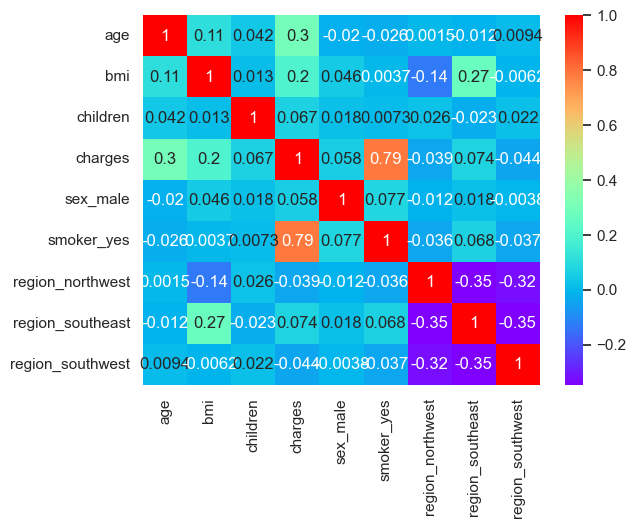

In [29]:
sns.heatmap(df.corr(),annot=True,cmap="rainbow")

In [30]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [31]:
X = df.drop(df.columns[3], axis=1)
calc_vif(X)
### we can contain with those variables or remove bmi but i have tried the two models and the
###better one to represent the data was the full model based on rsquare
#### the age and bmi values indicate that there is high multicollinearity between BMIand age and other variables in the model.

,variables,VIF
0,age,7.696862
1,bmi,11.359739
2,children,1.810971
3,sex_male,2.001959
4,smoker_yes,1.261476
5,region_northwest,1.888020
6,region_southeast,2.265574
7,region_southwest,1.960750


In [32]:
X = df.drop(['bmi','charges'],axis=1)
calc_vif(X)
### age are moderate we can ignore it and we removed the bmi 

,variables,VIF
0,age,3.852633
1,children,1.763406
2,sex_male,1.884591
3,smoker_yes,1.249948
4,region_northwest,1.706703
5,region_southeast,1.796145
6,region_southwest,1.715465


In [33]:
### identify our indep and dep variables
X = df.drop(columns=['charges',"bmi"], axis=1)
Y = df['charges']

In [34]:
## splitting the data into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)


In [45]:
### standardizing the variables
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.fit_transform(X_test)



In [46]:
# loading the Linear Regression model
regressor = LinearRegression()
regressor.fit(scaled_X_train, Y_train)

LinearRegression()

In [47]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [48]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  -185.3899974940279


In [49]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  -161.68174620792433


# Perdicitve model 

In [53]:
input_data = (31,2,1,1,1,0,1)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[142945.38170874]
The insurance cost is USD  142945.38170874456


In [54]:
# Model summary
import statsmodels.api as sm

X_train = sm.add_constant(X_train)  # Add a constant for the intercept
model = sm.OLS(Y_train, X_train).fit()

# Get the summary
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     356.5
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          7.46e-258
Time:                        08:52:35   Log-Likelihood:                -9488.7
No. Observations:                 935   AIC:                         1.899e+04
Df Residuals:                     927   BIC:                         1.903e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2959.8221    753.276  

In [55]:
###backward step wise 

def backward_stepwise_selection(X, Y):
    selected_features = list(X.columns)
    while True:
        x_selected = X[selected_features]
        model = sm.OLS(Y, sm.add_constant(x_selected)).fit()
        pvalues = model.pvalues[1:]  # Exclude the constant term
        max_pvalue = pvalues.max()
        if max_pvalue > 0.05:  # Stopping criterion (adjust as needed)
            remove_feature = pvalues.idxmax()
            selected_features.remove(remove_feature)
        else:
            break
    return selected_features, model

selected_features, final_model = backward_stepwise_selection(X,Y)
print("Selected features:", selected_features)
print(final_model.summary())


Selected features: ['age', 'children', 'smoker_yes']
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     1163.
Date:                Sun, 21 Apr 2024   Prob (F-statistic):               0.00
Time:                        08:52:43   Log-Likelihood:                -13607.
No. Observations:                1337   AIC:                         2.722e+04
Df Residuals:                    1333   BIC:                         2.724e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [56]:
### forward 
def forward_stepwise_selection(X, Y):
    selected_features = []
    remaining_features = list(X.columns)
    while True:
        best_pvalue = 1.0
        for feature in remaining_features:
            x_selected = X[selected_features + [feature]]
            model = sm.OLS(Y, sm.add_constant(x_selected)).fit(disp=0)
            pvalue = model.pvalues[feature]
            if pvalue < best_pvalue:
                best_pvalue = pvalue
                best_feature = feature
                best_model = model
        if best_pvalue < 0.05:  # Stopping criterion (adjust as needed)
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break
    return selected_features, best_model

selected_features, final_model = forward_stepwise_selection(X, Y)
print("Selected features:", selected_features)
print(final_model.summary())

Selected features: ['smoker_yes', 'age', 'children']
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     874.2
Date:                Sun, 21 Apr 2024   Prob (F-statistic):               0.00
Time:                        08:52:44   Log-Likelihood:                -13606.
No. Observations:                1337   AIC:                         2.722e+04
Df Residuals:                    1332   BIC:                         2.725e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

#  knowing that i made both step wise (forward,backward) but in the both methods he removed a variable that its important for me region after making it as a dummy variable 